- **Name: Aitik Gupta**
- **Roll No: 2018IMT-010**
- **Course: ML-Lab**
- **Course Code: ITIT-4107-2021**

## Problem Statemnt:

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a
loss.
1. Use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).
2. Consider a simple linear model with two parameters and one input variable and mean square error cost function to implement the gradient descent algorithm to find the intercepts. Assume a  suitable terminating condition. 
3. Plot the model alongside the scatterplot to show the fit model.
4. Perform steps 1,2,3 in batch mode for varying values of alpha, learning rate and plot the results.
5. For each of the experiments performed above in steps 1,2,3,4 with varying learning rates visualize the cost function as a contour plot as well as plot the values of parameters to visualize the stepwise traversion of the parameters on this contour plot.


In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# reading into dataframe

df = pd.read_csv("https://raw.githubusercontent.com/AlfTang/Linear-Regression/master/ex1data1.txt", names=['population', 'profit'], header = None)

In [3]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Visualizing the Data

Text(0, 0.5, 'Profit')

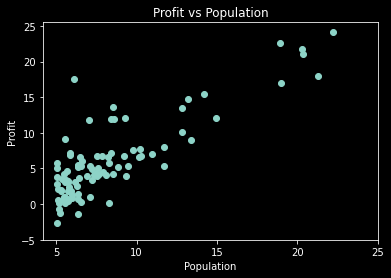

In [5]:
# profit vs population

plt.title("Profit vs Population")

plt.scatter(df['population'],df['profit'])

plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))

plt.xlabel("Population")
plt.ylabel("Profit")

In [6]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    squared_error = pow((predictions - y), 2)
    
    return 1 / (2 * m) * np.sum(squared_error)

In [7]:
data_n = df.values
m = len(data_n[:, -1])
X = np.append(np.ones((m, 1)),data_n[:, 0].reshape(m, 1), axis=1)
y = data_n[:, 1].reshape(m, 1)
theta = np.zeros((2, 1))

print(compute_cost(X, y, theta))

32.072733877455676


In [8]:

def gradient_descent(X, y, theta, alpha, iter_num):
    m = len(y)
    history = []

    for _ in range(iter_num):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(), (predictions - y))
        descent = alpha * 1 / m * error
        theta -= descent
        history.append(compute_cost(X, y, theta))

    return theta, history

In [9]:
def plot_model_fit(alpha, theta):
    plt.title(f"Profit vs Population with alpha = {alpha}\n")

    plt.scatter(df['population'], df['profit'])
    x_value = [x for x in range(25)]
    y_value = [y * theta[1] + theta[0] for y in x_value]

    plt.plot(x_value, y_value, color="r")
    plt.xticks(np.arange(5,30, step=5))
    plt.yticks(np.arange(-5,30, step=5))
    plt.xlabel("Population")
    plt.ylabel("Profit")


def logic(i):
    theta = np.zeros((2,1))
    alpha = alpha_values[i]
    theta, J_history = gradient_descent(X, y, theta, alpha, 100)

    print(f'ALPHA, learning_rate: {alpha}')
    print(f'THETA: {theta}')

    print('\nHypothesis Function:')
    print("h(x) = " + str(round(theta[0, 0], 2)) + " + " + str(round(theta[1, 0], 2)) + "x1")

    J_histories.append(J_history)
    plot_model_fit(alpha, theta)

Alpha: (10) [0.001 0.003 0.005 0.007 0.009 0.011 0.013 0.015 0.017 0.019]
ALPHA, learning_rate: 0.001
THETA: [[0.00868909]
 [0.80063674]]

Hypothesis Function:
h(x) = 0.01 + 0.8x1


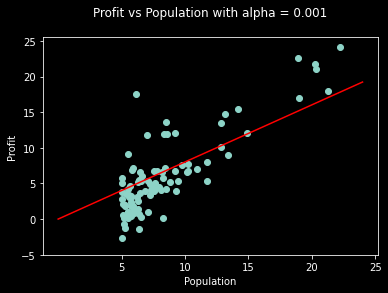

In [10]:

alpha_values = np.arange(0.001, 0.02, 0.002)
J_histories =[]

print("Alpha: ({})".format(len(alpha_values)), alpha_values)
logic(0)


ALPHA, learning_rate: 0.003
THETA: [[-0.12960188]
 [ 0.81468011]]

Hypothesis Function:
h(x) = -0.13 + 0.81x1


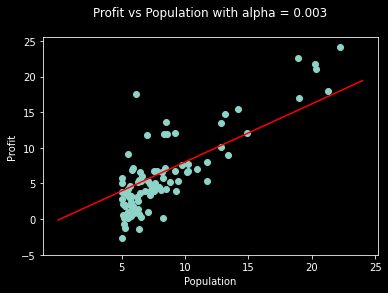

In [11]:
logic(1)

ALPHA, learning_rate: 0.005
THETA: [[-0.26305598]
 [ 0.82808702]]

Hypothesis Function:
h(x) = -0.26 + 0.83x1


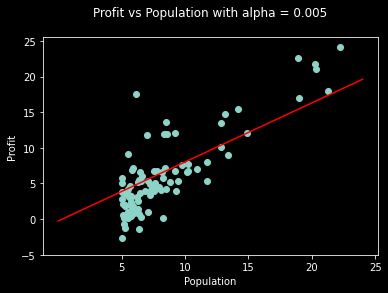

In [12]:
logic(2)

ALPHA, learning_rate: 0.007
THETA: [[-0.39182677]
 [ 0.84102345]]

Hypothesis Function:
h(x) = -0.39 + 0.84x1


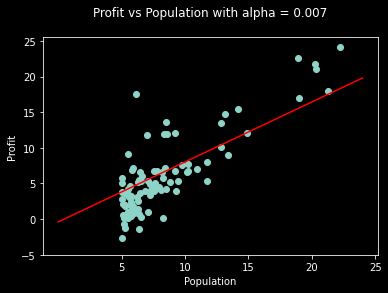

In [13]:
logic(3)

ALPHA, learning_rate: 0.009000000000000001
THETA: [[-0.516077  ]
 [ 0.85350573]]

Hypothesis Function:
h(x) = -0.52 + 0.85x1


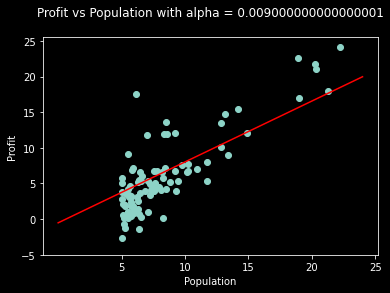

In [14]:
logic(4)

ALPHA, learning_rate: 0.011
THETA: [[-0.63596383]
 [ 0.86554966]]

Hypothesis Function:
h(x) = -0.64 + 0.87x1


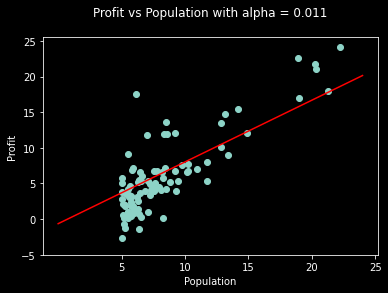

In [15]:
logic(5)

ALPHA, learning_rate: 0.013000000000000001
THETA: [[-0.75163899]
 [ 0.87717049]]

Hypothesis Function:
h(x) = -0.75 + 0.88x1


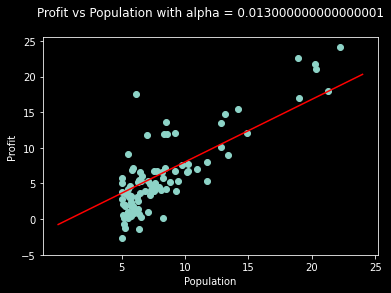

In [16]:
logic(6)

ALPHA, learning_rate: 0.015
THETA: [[-0.863249  ]
 [ 0.88838292]]

Hypothesis Function:
h(x) = -0.86 + 0.89x1


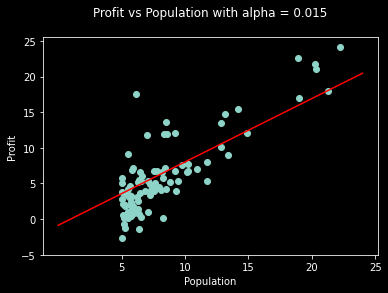

In [17]:
logic(7)

ALPHA, learning_rate: 0.017
THETA: [[-0.97093532]
 [ 0.89920118]]

Hypothesis Function:
h(x) = -0.97 + 0.9x1


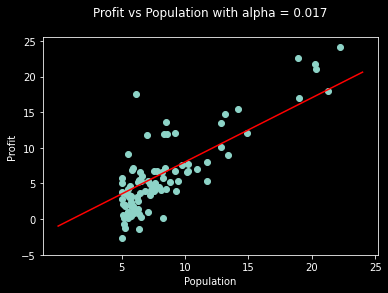

In [18]:
logic(8)

ALPHA, learning_rate: 0.019000000000000003
THETA: [[-1.07483455]
 [ 0.90963899]]

Hypothesis Function:
h(x) = -1.07 + 0.91x1


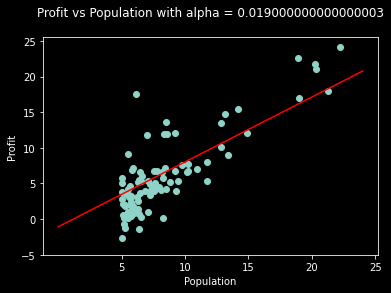

In [19]:
logic(9)

In [20]:
x = np.arange(1,125,1.25)
y = alpha_values

print(len(x))

100


In [21]:
# minmax

print(min(min(J_histories)))
print(max(max(J_histories)))

5.376953190466999
27.94761974682486


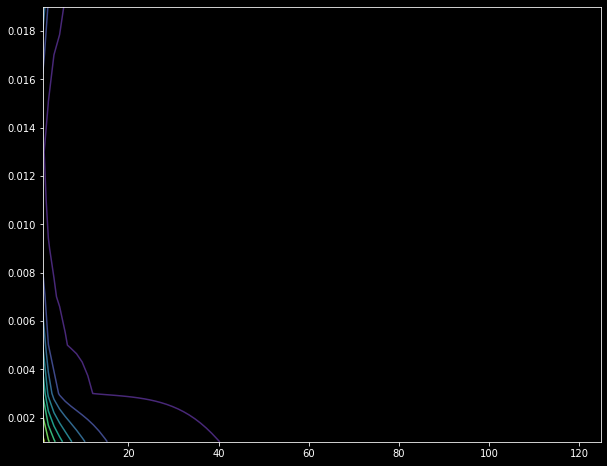

In [22]:
z = J_histories

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.contour(x,y,z)
plt.show()

In [23]:
import plotly.graph_objects as go

# x == cost function value
# y == learning rates
# z == cost function value at a given learning rate

fig = go.Figure(data=go.Contour(
    x=x, y=y, z=z,
    contours=dict(
        coloring='lines',
        showlabels=True,),
    line_width=2
))

fig.show()

## Inference


If slope:
- is +ve: $\theta$j = $\theta$j – (+ve value). => $\theta$j decreases. <br >
- is -ve: $\theta$j = $\theta$j – (-ve value). => $\theta$j increases. <br >

Correct learning rate is important as it ensures that Gradient Descent converges (in a reasonable time):
- If α is very large, Gradient Descent can overshoot the minimum at every minimisation step. It may fail to converge and can even diverge.
- If α if very small, Gradient Descent will take infinitely small steps. (it would reach local minima but will take a very long time)